# Riddler Classic, July 15
The text of the riddler is 

Congratulations! The Acme Axegrinders, which you own, are the regular season champions of the National Squishyball League (NSL). Your team will now play a championship series against the Boondocks Barbarians, which had the second-best regular season record. You feel good about Acme’s chances in the series because Acme won exactly 60 percent of the hundreds of games it played against Boondocks this season. (The NSL has an incredibly long regular season.) The NSL has two special rules for the playoffs:

The owner of the top-seeded team (i.e., you) gets to select the length of the championship series in advance of the first game, so you could decide to play a single game, a best two out of three series, a three out of five series, etc., all the way up to a 50 out of 99 series.
The owner of the winning team gets \$1 million minus \$10,000 for each of the victories required to win the series, regardless of how many games the series lasts in total. Thus, if the top-seeded team’s owner selects a single-game championship, the winning owner will collect \$990,000. If he or she selects a 4 out of 7 series, the winning team’s owner will collect $960,000. The owner of the losing team gets nothing.
Since Acme has a 60 percent chance of winning any individual game against Boondocks, Rule 1 encourages you to opt for a very long series to improve Acme’s chances of winning the series. But Rule 2 means that a long series will mean less winnings for you if Acme does take the series.

How long a series should you select in order to maximize your expected winnings? And how much money do you expect to win?

# Some comments
There are two important parameters in this problem, which is the probability of the favorite team winning each game and the ratio of the winning prize (I'll call this $M$) to the penalty caused by each additional game (I'll call this $G$). Let $P_c$ be the probability of the favorite team winning a series when it needs to win $c$ games out of $2c-1$ games, and $s$ be the probability of the favorite team winning each game. The expected earnings for the favorite team in a series is
$$
\$_c = P_c \left( M - G c \right)
$$
This function is in general increasing for small values of $c$ until it reaches a maximum and decreases. To find this maximum, we must find the smallest $c$ such that $\$_{c+1} \leq \$_c$, which means 
$$
\left(P_{c+1}-P_c\right) \left(M-Gc-G\right) - GP_{c} \leq 0
$$


## Analytical methods
Let $P_c$ be the probability of the favorite team winning a series when it needs to win $c$ games out of $2c-1$ games. With $s$ being the probability of the favorite team winning each game, then this probability is 
$$
P_c = \sum_{n=0}^{c-1} \left(\begin{array}{c} 2c-1 \\ n\end{array}\right) s^{2c-1-n}\left(1-s\right)^n
$$
Here, the index $n$ in the sum corresponds to the number of games won by the underdog.
With some calculations, we can reach also a relation between $P_{c+1}$ and $P_c$,
$$
P_{c+1} - P_c = \left(2s-1\right)\left(\begin{array}{c} 2c-1 \\ c-1\end{array}\right) \left(s-s^2\right)^c
$$
We end up with the equation
$$
P_c \geq \left(2s-1\right)\left(\begin{array}{c} 2c-1 \\ c-1\end{array}\right) \left(s-s^2\right)^c \left(\frac{M}{G}-c-1\right)
$$


## Numerical methods
Below we add some numerical functions that calculate the winning probability in a series that requires $c$ wins, the expected payoff and maximizes the expected payoff.

In [131]:
import pylab as py
from scipy.misc import comb
def WinningProbability(c,s):
    winning = s;
    auxA = 2*s - 1
    auxB0 = s-s**2
    auxB = auxB0 + 0.0
    for cc in range(1,c):
        winning += comb(2*cc-1,cc-1) * auxA * auxB
        auxB *= auxB0
    return winning
def getPayoff(c,s,ratioMG):
    winning = WinningProbability(c,s)
    return winning * (ratioMG-c)
def FindMaximum(s,ratioMG):
    c=1
    payoff = WinningProbability(c,s) * (ratioMG  - c)
    while c<50:
        nextPayoff = WinningProbability(c+1,s) * (ratioMG  - c - 1)
        if nextPayoff <= payoff:
            return c
        else:
            payoff = nextPayoff + 0.0
        c+=1
    return c

The maximization under the proposed parameters ($s = 0.6$ and $\frac{M}{G} = 100$) is

In [133]:
c = FindMaximum(0.6,100)
print 'The optimal series is a best {:d}-of-{:d}.'.format(c,2*c-1)

The optimal series is a best 13-of-25.


We can also plot the expected payoff as a function of the number of required games to win.

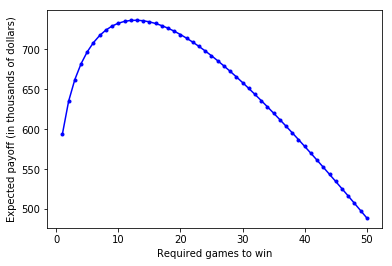

In [140]:
%matplotlib inline
fig,ax = py.subplots()
xplot = range(1,51)
yplot = map(lambda x:getPayoff(x,0.6,100),xplot)
ax.plot(xplot,10*py.array(yplot),'b.-')
ax.set_xlabel('Required games to win')
ax.set_ylabel('Expected payoff (in thousands of dollars)')

In [124]:
#ratio = 10**(py.linspace(1,3,20,endpoint=False))
ratio = py.linspace(0,1000,20,endpoint=False)
ss = py.linspace(0.5,1.0,51)[:]
m = py.array([[FindMaximum(x,y) for x in ss] for y in ratio])

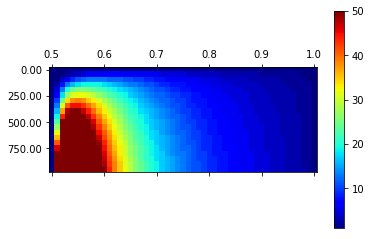

In [129]:
%matplotlib inline
fig,ax = py.subplots()
plot = ax.matshow(m,cmap='jet')
py.colorbar(plot)
ax.set_xticklabels([str(ss[int(x)]) for x in ax.get_xticks()[:-1]])
ax.set_yticklabels(['{:.2f}'.format(ratio[int(x)]) for x in ax.get_yticks()[:-1]])

In [91]:
min(m.flatten())

-1

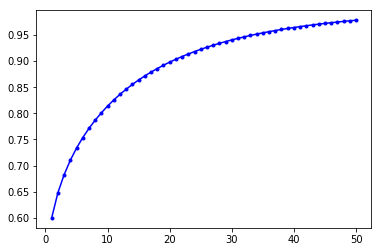

In [44]:
%matplotlib inline
fig,ax = py.subplots()
xplot = range(1,51)
yplot = map(lambda x:WinningProbability(x,0.6),xplot)
ax.plot(xplot,yplot,'b.-')

(450000, 1000000)

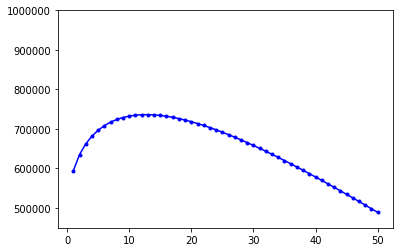

In [51]:
%matplotlib inline
fig,ax = py.subplots()
xplot = range(1,51)
yplot = map(lambda x:getPayoff(x,0.6,100),xplot)
ax.plot(xplot,10000*py.array(yplot),'b.-')
ax.set_ylim(450000,1000000)

In [62]:
FindMaximum(0.6,100)

13

In [63]:
getPayoff(13,0.6,100)

73.622204099108615

In [59]:
max(yplot)

73.622204099108615